In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import module_heliquest_like
from module_heliquest_like import amino_acids

In [4]:
df = pd.read_csv('./SourceData/AA.csv')

In [5]:
df.head()

,Gene_name,AH_seq,AH_localization,Group
0,KDSR,GLFRTIALFYLGSFDSIV,Golgi/ER/NE,1
1,TMEM214,CASHLAWFGDSLTSLSQRLQ,Golgi/Vesicles/PM,1
2,mboat7,LADTLRYWAS,Golgi/ER?,1
3,vma21,LASTLKTLL,Golgi/ER/NE,1
4,EMC7,VSEFMTRLFS,Golgi/ER/NE?,1


In [6]:
for i, SEQ in enumerate(df.AH_seq.to_list()):
    aa_seq = module_heliquest_like.AA_seq(SEQ)

    aa_seq.calculate_hydrophobic_moment()
    aa_seq.extract_face_sequences()
    aa_seq.calculate_hydrophobicity()
    aa_seq.calculate_netcharge()
    aa_seq.calculate_dfactor()

    for AA in amino_acids:
        df.loc[i, 'phil_' + AA] = round(aa_seq.hydro_philic_face.count(AA) / len(aa_seq.hydro_philic_face), 2)
        df.loc[i, 'phob_' + AA] = round(aa_seq.hydro_phobic_face.count(AA) / len(aa_seq.hydro_philic_face), 2)
   
    df.loc[i, 'Length'] = len(SEQ)
    df.loc[i, 'Hydrophobicity'] = round(aa_seq.mean_hydrophobicity, 3)    
    df.loc[i, 'H_moment'] = aa_seq.mean_hydrophobic_moment
    df.loc[i, 'Netcharge'] = round(aa_seq.netcharge, 3)
    df.loc[i, 'Dfactor'] = round(aa_seq.dfactor, 3)

In [6]:
df.columns

Index(['Gene_name', 'AH_seq', 'AH_localization', 'Group', 'phil_A', 'phob_A',
       'phil_G', 'phob_G', 'phil_V', 'phob_V', 'phil_L', 'phob_L', 'phil_I',
       'phob_I', 'phil_F', 'phob_F', 'phil_W', 'phob_W', 'phil_M', 'phob_M',
       'phil_Y', 'phob_Y', 'phil_C', 'phob_C', 'phil_S', 'phob_S', 'phil_T',
       'phob_T', 'phil_R', 'phob_R', 'phil_K', 'phob_K', 'phil_N', 'phob_N',
       'phil_Q', 'phob_Q', 'phil_D', 'phob_D', 'phil_E', 'phob_E', 'phil_H',
       'phob_H', 'phil_P', 'phob_P', 'Length', 'Hydrophobicity', 'H_moment',
       'Netcharge', 'Dfactor'],
      dtype='object')

## Output entire sheet

In [14]:
df.to_csv('./Output/entiresheet.csv', index=False)

## Output helix property values for Prism

In [8]:
df_helix_property = df[['Gene_name', 'AH_seq', 'AH_localization', 'Length',
                   'Hydrophobicity', 'H_moment', 'Netcharge', 'Dfactor']]
df_helix_property.to_csv('./Output/sheet4prism.csv', index=False)

## Heatmap

In [9]:
df_boundAH = df[df.Group != 4]

In [10]:
df_for_heatmap_phobic = df_boundAH[['phob_A', 'phob_G', 'phob_V', 'phob_L',
       'phob_I', 'phob_F', 'phob_W', 'phob_M', 'phob_Y', 'phob_C', 'phob_S',
       'phob_T', 'phob_R', 'phob_K', 'phob_N', 'phob_Q', 'phob_D', 'phob_E',
       'phob_H', 'phob_P']]

df_for_heatmap_philic = df_boundAH[['phil_A', 'phil_G', 'phil_V',
       'phil_L', 'phil_I', 'phil_F', 'phil_W', 'phil_M', 'phil_Y', 'phil_C',
       'phil_S', 'phil_T', 'phil_R', 'phil_K', 'phil_N', 'phil_Q', 'phil_D',
       'phil_E', 'phil_H', 'phil_P']]

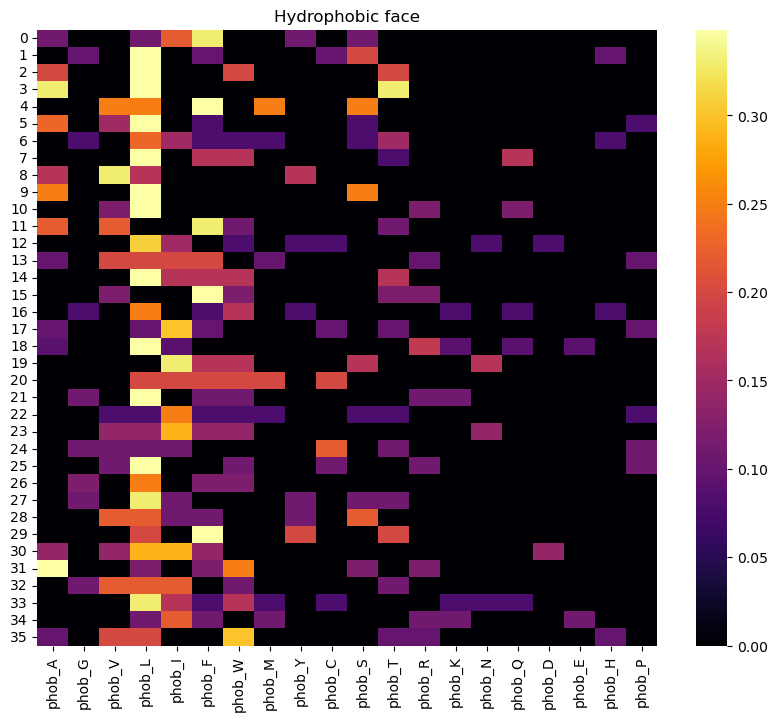

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_for_heatmap_phobic, annot=False, cmap='inferno', fmt=".2f", robust=True)
plt.title('Hydrophobic face')
plt.savefig('./Output/hydrophobic.pdf', format='pdf', bbox_inches='tight')
plt.show()
plt.close()

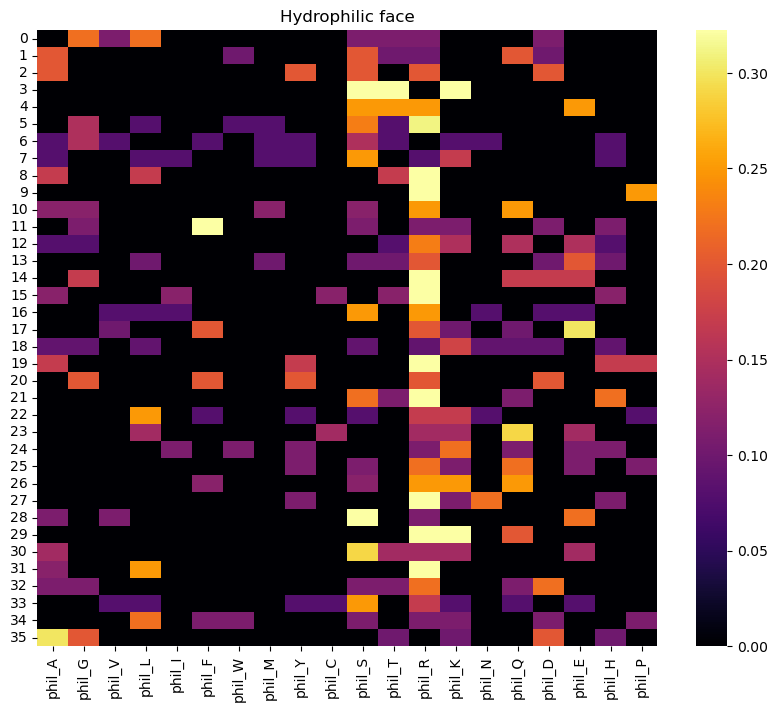

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_for_heatmap_philic, annot=False, cmap='inferno', fmt=".2f", robust=True)
plt.title('Hydrophilic face')
plt.savefig('./Output/hydrophilic.pdf', format='pdf', bbox_inches='tight')
plt.show()
plt.close()

### Some columns combined

In [37]:
df['phil_LI'] = df.phil_L + df.phil_I
df['phil_FY'] = df.phil_F + df.phil_Y
df['phil_ST'] = df.phil_S + df.phil_T
df['phil_KR'] = df.phil_K + df.phil_R
df['phil_NQ'] = df.phil_N + df.phil_Q
df['phil_DE'] = df.phil_D + df.phil_E

df_for_heatmap_philic_test = df[['Group', 'phil_A', 'phil_G', 'phil_V',
       'phil_W', 'phil_M', 'phil_C', 'phil_LI', 'phil_FY', 'phil_ST', 'phil_KR', 'phil_DE',
       'phil_NQ', 'phil_H', 'phil_P']]

df_for_heatmap_philic_test_sub = df_for_heatmap_philic_test[df_for_heatmap_philic_test.Group != 4]

In [ ]:
df_for_heatmap_philic_test_sub.to_csv('./Output_philic_concentrated.csv', index=False)

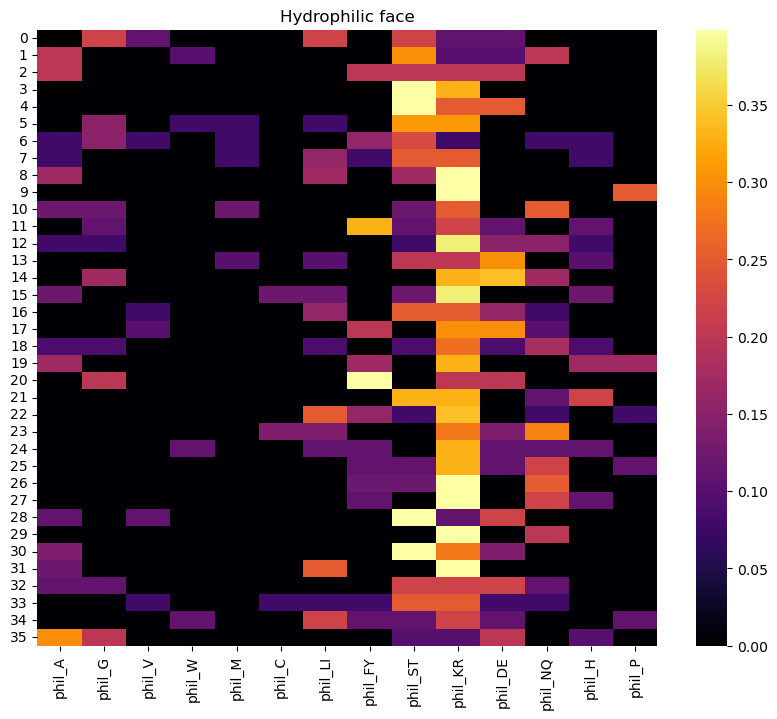

In [36]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_for_heatmap_philic_test_sub.drop(columns=['Group']), annot=False, cmap='inferno', fmt=".2f", robust=True)
plt.title('Hydrophilic face')
# plt.savefig('./hydrophilic.pdf', format='pdf', bbox_inches='tight')
plt.show()
plt.close()

### AHs from other species

In [64]:
df = pd.read_csv('../../../AH_Organisms.csv')

In [65]:
df['AHseq'] = df.AHseq.str.strip().str.replace('-', '')
df = df.drop_duplicates(subset=['Name',  'AHseq'])
df.reset_index(inplace=True, drop=True)

In [68]:
for i, SEQ in enumerate(df.AHseq.to_list()):
    aa_seq = module_heliquest_like.AA_seq(SEQ)

    aa_seq.calculate_hydrophobic_moment()
    aa_seq.extract_face_sequences()
    aa_seq.calculate_hydrophobicity()
    aa_seq.calculate_netcharge()
    aa_seq.calculate_dfactor()

    for AA in amino_acids:
        df.loc[i, 'phil_' + AA] = round(aa_seq.hydro_philic_face.count(AA) / len(aa_seq.hydro_philic_face), 2)
        df.loc[i, 'phob_' + AA] = round(aa_seq.hydro_phobic_face.count(AA) / len(aa_seq.hydro_philic_face), 2)
   
    df.loc[i, 'Length'] = len(SEQ)
    df.loc[i, 'Hydrophobicity'] = round(aa_seq.mean_hydrophobicity, 3)    
    df.loc[i, 'H_moment'] = aa_seq.mean_hydrophobic_moment
    df.loc[i, 'Netcharge'] = round(aa_seq.netcharge, 3)
    df.loc[i, 'Dfactor'] = round(aa_seq.dfactor, 3)

In [71]:
df.to_csv('./Output/Species_AH.csv', index=False)

In [86]:
df_vertbrate = df[(df.Organisms != 'Fly') & (df.Organisms != 'Roundworm') & (df.Organisms != 'Plant')]

In [88]:
df_vertbrate.to_csv('./Output/Vertebrates_AH.csv', index=False)

In [87]:
df_vertbrate.head()

,Name,AHseq,Organisms,Group,phil_A,phob_A,phil_G,phob_G,phil_V,phob_V,...,phob_E,phil_H,phob_H,phil_P,phob_P,Length,Hydrophobicity,H_moment,Netcharge,Dfactor
0,KDSR,GLFRTIALFYLGSFDSIV,Human,1,0.0,0.11,0.22,0.00,0.11,0.00,...,0.0,0.0,0.0,0.0,0.0,18.0,0.831,0.363703,0.0,0.343
1,KDSR,GLFRTIALFYLGSFDNIV,Mouse,1,0.0,0.11,0.22,0.00,0.00,0.11,...,0.0,0.0,0.0,0.0,0.0,18.0,0.800,0.375255,0.0,0.354
2,KDSR,GIFRIVGLFYLGSFDSIV,Chicken,1,0.0,0.00,0.22,0.11,0.11,0.11,...,0.0,0.0,0.0,0.0,0.0,18.0,0.873,0.286462,0.0,0.270
3,KDSR,GLFRIIALFYLGSFDSIV,Frog,1,0.0,0.11,0.22,0.00,0.11,0.00,...,0.0,0.0,0.0,0.0,0.0,18.0,0.917,0.316200,0.0,0.298
5,TMEM214,CASHLAWFGDSLTSLSQRLQ,Human,1,0.2,0.00,0.00,0.10,0.00,0.00,...,0.0,0.0,0.1,0.0,0.0,20.0,0.550,0.444784,0.0,0.420


/var/folders/m7/787c0tz57pgbsbyyv_bdmmp00000gn/T/ipykernel_1557/1310587202.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Name', y='Dfactor', hue='Organisms', data=df_first_half, ci=None)


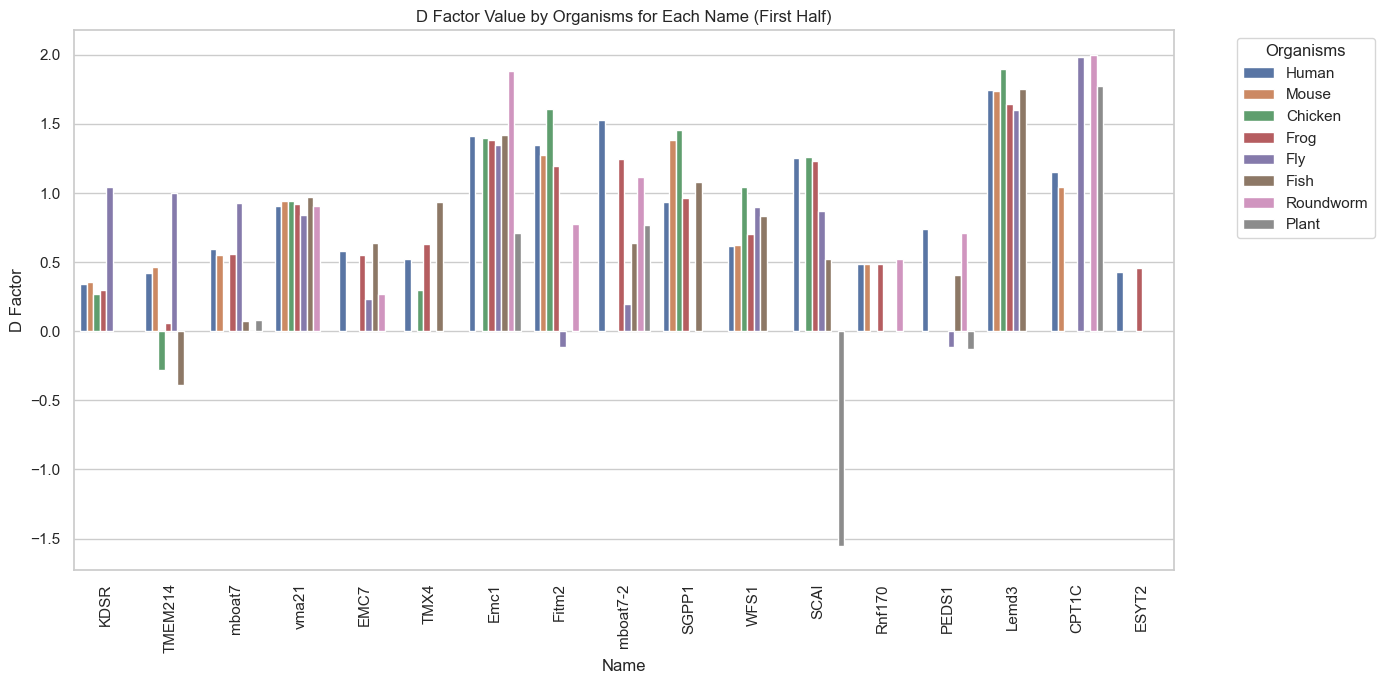

/var/folders/m7/787c0tz57pgbsbyyv_bdmmp00000gn/T/ipykernel_1557/1310587202.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Name', y='Dfactor', hue='Organisms', data=df_second_half, ci=None)


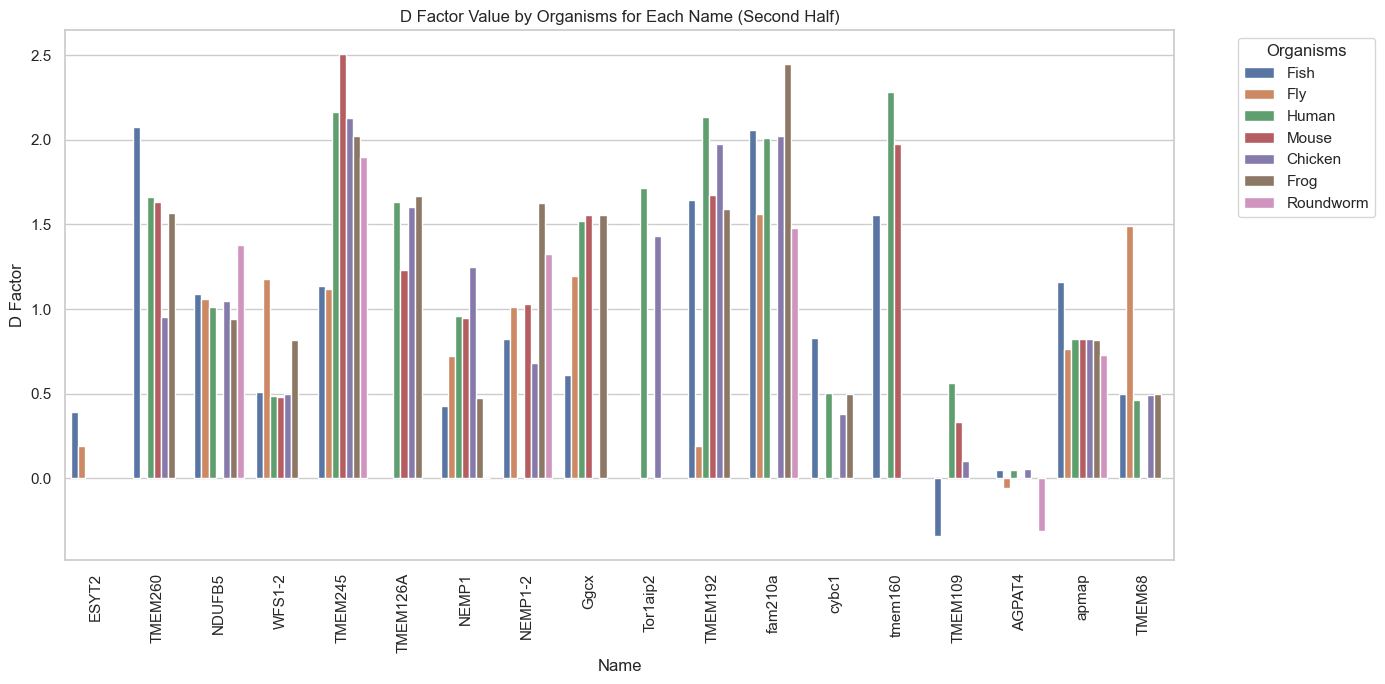

In [75]:
# Splitting the data into two halves
df_first_half = df.iloc[:len(df)//2]
df_second_half = df.iloc[len(df)//2:]

# Plotting the first half
plt.figure(figsize=(14, 7))
sns.barplot(x='Name', y='Dfactor', hue='Organisms', data=df_first_half, ci=None)
plt.title('D Factor Value by Organisms for Each Name (First Half)')
plt.xlabel('Name')
plt.ylabel('D Factor')
plt.xticks(rotation=90)
plt.legend(title='Organisms', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plotting the second half
plt.figure(figsize=(14, 7))
sns.barplot(x='Name', y='Dfactor', hue='Organisms', data=df_second_half, ci=None)
plt.title('D Factor Value by Organisms for Each Name (Second Half)')
plt.xlabel('Name')
plt.ylabel('D Factor')
plt.xticks(rotation=90)
plt.legend(title='Organisms', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [77]:
df_for_heatmap_phobic = df[['phob_A', 'phob_G', 'phob_V', 'phob_L',
       'phob_I', 'phob_F', 'phob_W', 'phob_M', 'phob_Y', 'phob_C', 'phob_S',
       'phob_T', 'phob_R', 'phob_K', 'phob_N', 'phob_Q', 'phob_D', 'phob_E',
       'phob_H', 'phob_P']]

df_for_heatmap_philic = df[['phil_A', 'phil_G', 'phil_V',
       'phil_L', 'phil_I', 'phil_F', 'phil_W', 'phil_M', 'phil_Y', 'phil_C',
       'phil_S', 'phil_T', 'phil_R', 'phil_K', 'phil_N', 'phil_Q', 'phil_D',
       'phil_E', 'phil_H', 'phil_P']]

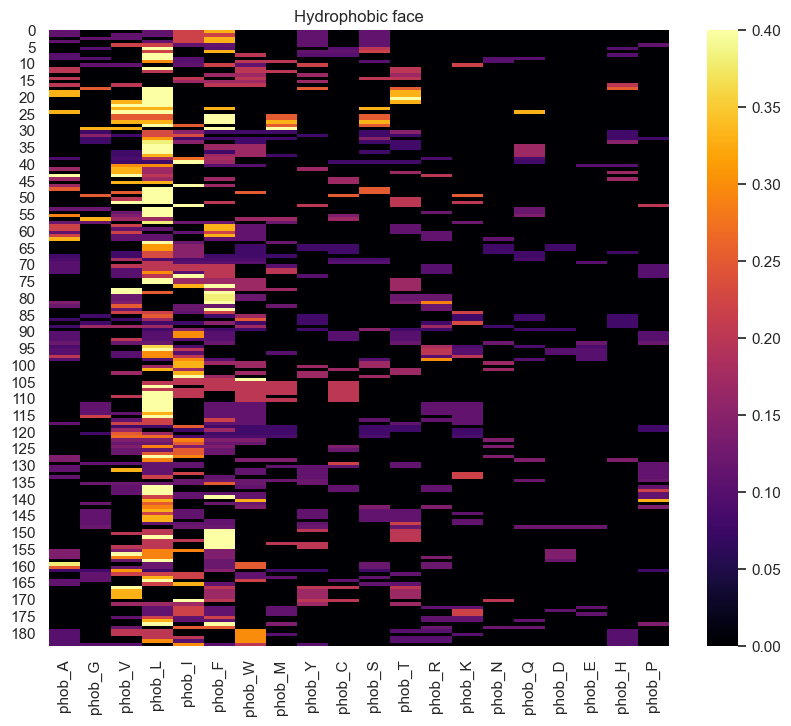

In [78]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_for_heatmap_phobic, annot=False, cmap='inferno', fmt=".2f", robust=True)
plt.title('Hydrophobic face')
plt.show()
plt.close()

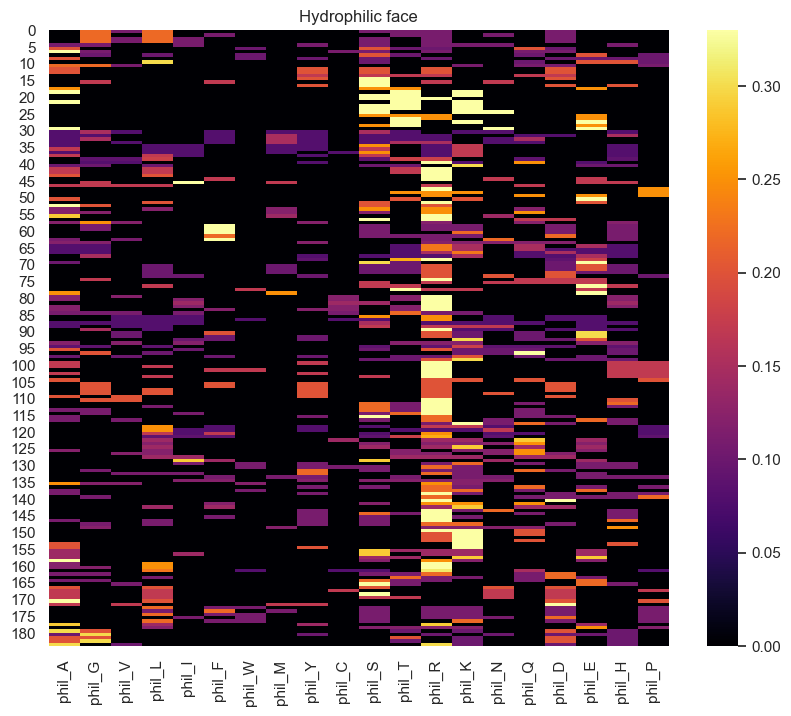

In [80]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_for_heatmap_philic, annot=False, cmap='inferno', fmt=".2f", robust=True)
plt.title('Hydrophilic face')
plt.show()
plt.close()